In [72]:
import numpy as np
import matplotlib.pyplot as plt
import random

(-1.0890343576303314,
 1.0924311994705795,
 -1.0902445190189471,
 1.098943911600414)

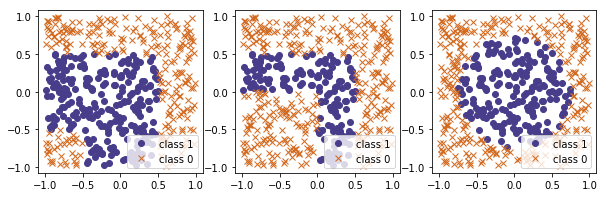

In [73]:
num_obs = 500
np.random.seed(42)
x_mat_1 = np.random.uniform(-1, 1, size=(num_obs, 2))
x_mat_bias = np.ones((num_obs, 1))
x_mat_full = np.concatenate((x_mat_1, x_mat_bias), axis=1)

y1 = ((np.maximum(x_mat_full[:,0], x_mat_full[:,1]) <0.5) & (np.maximum(x_mat_full[:,0], x_mat_full[:,1]) >-0.5)).astype(int)

y2 = ((np.maximum(x_mat_full[:,0], x_mat_full[:,1]) <0.5) & (np.maximum(x_mat_full[:,0], x_mat_full[:,1]) >0)).astype(int)

# # Circle pattern
y = (np.sqrt(x_mat_full[:,0]**2 + x_mat_full[:,1]**2)<.75).astype(int)

# # Diamond Pattern
# y = ((np.abs(x_mat_full[:,0]) + np.abs(x_mat_full[:,1]))<1).astype(int)

plt.figure(figsize = (10,3))
ax1 = plt.subplot(1,3,1)
ax1.plot(x_mat_full[y1==1, 0], x_mat_full[y1==1, 1], 'ro', label='class 1', color='darkslateblue')
ax1.plot(x_mat_full[y1==0, 0], x_mat_full[y1==0, 1], 'bx', label='class 0', color='chocolate')
ax1.legend(loc='best')
ax1.axis('equal')

ax2 = plt.subplot(1,3,2)
ax2.plot(x_mat_full[y2==1, 0], x_mat_full[y2==1, 1], 'ro', label='class 1', color='darkslateblue')
ax2.plot(x_mat_full[y2==0, 0], x_mat_full[y2==0, 1], 'bx', label='class 0', color='chocolate')
ax2.legend(loc='best')
ax2.axis('equal')

ax3 = plt.subplot(1,3,3)
ax3.plot(x_mat_full[y==1, 0], x_mat_full[y==1, 1], 'ro', label='class 1', color='darkslateblue')
ax3.plot(x_mat_full[y==0, 0], x_mat_full[y==0, 1], 'bx', label='class 0', color='chocolate')
ax3.legend(loc='best')
ax3.axis('equal')


In [74]:
def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))


def loss_fn(y_true, y_pred, eps=1e-16):
    
    y_pred = np.maximum(y_pred, eps)
    y_pred = np.minimum(y_pred, 1-eps)
    
    return -(np.sum(y_true * np.log(y_pred)) + np.sum((1-y_true) * np.log(1 - y_pred))) / len(y_true)


def forward_pass(W1, W2):
    
    global x_mat
    global y
    global num_
    
    #compute new predictions 'y_pred'
    z_2 = np.dot(x_mat, W_1)
    a_2 = sigmoid(z_2)
    z_3 = np.dot(a_2, W_2)
    y_pred = sigmoid(z_3).reshape((len(x_mat),))
    
    #compute the gradient
    J_z_3_grad = -y + y_pred
    J_W_2_grad = np.dot(J_z_3_grad, a_2)
    a_2_z_2_grad = sigmoid(z_2)*(1-sigmoid(z_2))
    J_W_1_grad = (np.dot((J_z_3_grad).reshape(-1,1), W_2.reshape(-1,1).T)*a_2_z_2_grad).T.dot(x_mat).T
    gradient = (J_W_1_grad, J_W_2_grad)
    
    #return
    return y_pred, gradient

def plot_loss_accuracy(loss_vals, accuracies):
    fig = plt.figure(figsize=(16,8))
    fig.suptitle('Log Loss and Accuracy over iterations')
    
    ax = fig.add_subplot(1,2,1)
    ax.plot(loss_vals)
    ax.grid(True)
    ax.set(xlabel='iterations', title='Log Loss')
    
    ax = fig.add_subplot(1,2,2)
    ax.plot(accuracies)
    ax.grid(True)
    ax.set(xlabel='iterations', title='Accuracy')

iteration 0, log loss is 0.724230097288832, accuracy is 0.588
iteration 500, log loss is 0.3584959674781469, accuracy is 0.854
iteration 1000, log loss is 0.15277523673478283, accuracy is 0.938
iteration 1500, log loss is 0.1469611616180639, accuracy is 0.95
iteration 2000, log loss is 0.1221678296771967, accuracy is 0.956
iteration 2500, log loss is 0.11158593191861219, accuracy is 0.966
iteration 3000, log loss is 0.11486005848701894, accuracy is 0.964
iteration 3500, log loss is 0.10772165427958162, accuracy is 0.968
iteration 4000, log loss is 0.10031139071699156, accuracy is 0.96
iteration 4500, log loss is 0.059437988287694324, accuracy is 0.99
iteration 5000, log loss is 0.102171183931993, accuracy is 0.954
iteration 5500, log loss is 0.05298811804541616, accuracy is 0.992
iteration 6000, log loss is 0.04913471521457136, accuracy is 0.994
iteration 6500, log loss is 0.04692219958537075, accuracy is 0.992
iteration 7000, log loss is 0.04512480129226131, accuracy is 0.992
iteratio

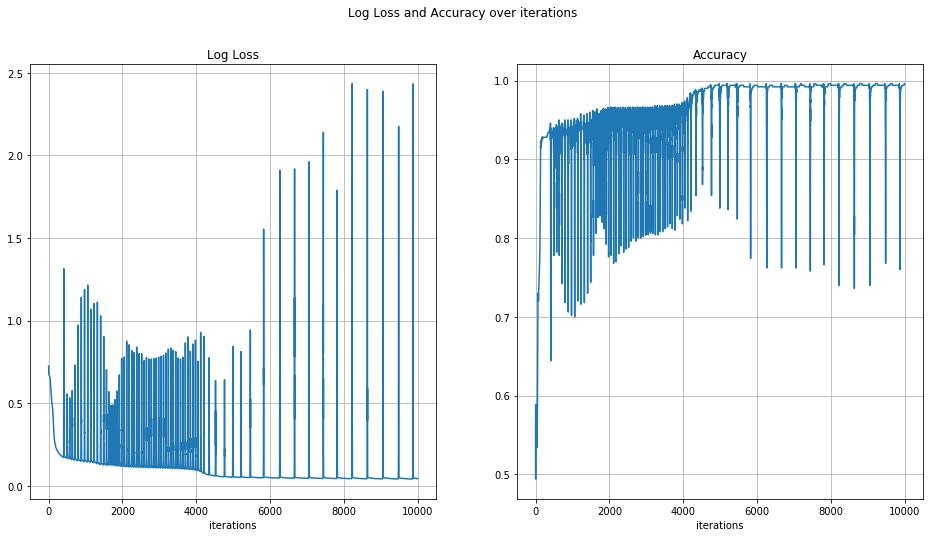

In [96]:
np.random.seed(1241)

W_1 = np.random.uniform(-1, 1, size=(3,4))
W_2 = np.random.uniform(-1, 1, size=(4))
num_iter = 10000
learning_rate = 0.01
x_mat = x_mat_full

loss_vals, accuracies = [], []

for i in range(num_iter+1):
    
    y_pred, (J_W_1_grad, J_W_2_grad) = forward_pass(W_1, W_2)
    
    W_1 = W_1 - learning_rate * J_W_1_grad
    W_2 = W_2 - learning_rate * J_W_2_grad
    
    curr_loss = loss_fn(y, y_pred)
    loss_vals.append(curr_loss)
    acc = np.sum((y_pred>=0.5) == y)/num_obs
    accuracies.append(acc)
    
    if ((i%500) == 0):
        print(f'iteration {i}, log loss is {curr_loss}, accuracy is {acc}')
        
plot_loss_accuracy(loss_vals, accuracies)

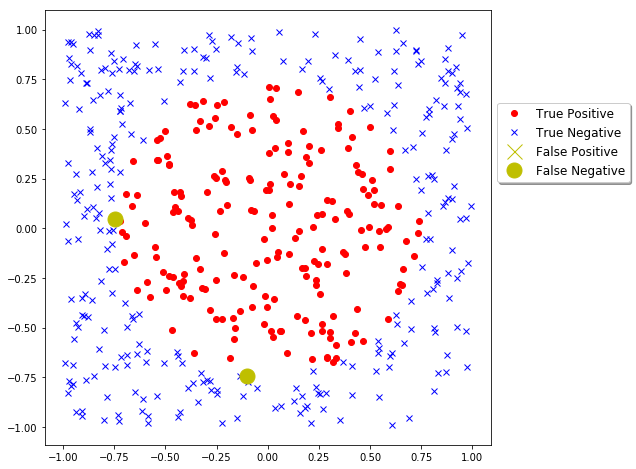

In [111]:
pred1 = (y_pred >= 0.5).astype(int)
#pred0 = (y_pred < 0.5).astype('int')

plt.figure(figsize = (8,8))
#true positive
plt.plot(x_mat[(pred1==1)&(y==1), 0], x_mat[(pred1==1)&(y==1), 1], 'ro', label='True Positive')
#true negative
plt.plot(x_mat[(pred1==0)&(y==0), 0], x_mat[(pred1==0)&(y==0), 1], 'bx', label='True Negative')
#false positive 
plt.plot(x_mat[(pred1==1)&(y==0), 0], x_mat[(pred1==1)&(y==0), 1], 'yx', label='False Positive', markersize=15)
#false negative
plt.plot(x_mat[(pred1==0)&(y==1), 0], x_mat[(pred1==0)&(y==1), 1], 'yo', label='False Negative', markersize=15)
plt.legend(bbox_to_anchor=(1, 0.8), shadow = True,fontsize = 'large')